In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

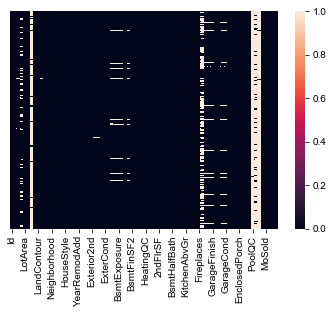

In [5]:
sns.heatmap(df2.isnull(),yticklabels=False)
sns.set(rc={"figure.figsize":(10, 19)}) #width=9, height=10

In [5]:
for x in ['PoolQC','MiscFeature','Alley','Fence']:
    df.drop(x,1, inplace = True)
    df2.drop(x,1, inplace = True)

In [6]:
df.loc[df['Fireplaces'] == 0, 'FireplaceQu'] = "NA"
df2.loc[df2['Fireplaces'] == 0, 'FireplaceQu'] = "NA"


In [7]:
df2.isnull().sum().sort_values().tail(20)

Exterior1st       1
Exterior2nd       1
BsmtFullBath      2
Utilities         2
Functional        2
BsmtHalfBath      2
MSZoning          4
MasVnrArea       15
MasVnrType       16
BsmtFinType2     42
BsmtFinType1     42
BsmtExposure     44
BsmtQual         44
BsmtCond         45
GarageType       76
GarageYrBlt      78
GarageQual       78
GarageCond       78
GarageFinish     78
LotFrontage     227
dtype: int64

In [8]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)
df2['LotFrontage'].fillna(df2['LotFrontage'].mean(),inplace=True)


In [9]:
df2.isnull().sum().sort_values().tail(20)

Exterior1st      1
Exterior2nd      1
KitchenQual      1
BsmtHalfBath     2
Utilities        2
Functional       2
BsmtFullBath     2
MSZoning         4
MasVnrArea      15
MasVnrType      16
BsmtFinType2    42
BsmtFinType1    42
BsmtExposure    44
BsmtQual        44
BsmtCond        45
GarageType      76
GarageQual      78
GarageCond      78
GarageFinish    78
GarageYrBlt     78
dtype: int64

In [10]:
for x in ['GarageType','GarageYrBlt','GarageFinish','GarageCond','GarageQual']:
    df[x].fillna(df[x].mode()[0],inplace=True)
    df2[x].fillna(df2[x].mode()[0],inplace=True)
for x in ['BsmtCond','BsmtFinType1','BsmtQual','BsmtExposure','BsmtFinType2']:
    df[x].fillna("NA",inplace = True)
    df2[x].fillna("NA",inplace = True)

In [11]:
df.dropna(axis=1,inplace=True)
df2.dropna(axis=1,inplace=True)

In [12]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 59 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1459 non

In [13]:
df['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [14]:
#Dropping unnessesary columns
for x in ['MSZoning','Utilities','Exterior1st','Exterior2nd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','GarageCars','GarageArea','SaleType']:
    df.drop(x,axis=1,inplace=True)

df.drop('Id',axis=1,inplace=True)

df2.drop('Id',axis=1,inplace=True)
df2.drop('Electrical',axis=1,inplace=True)


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1460 non-null object
BsmtCond         1460 no

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 57 columns):
MSSubClass       1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1459 non-null object
BsmtCond         1459 no

In [38]:
X = df.drop('SalePrice',1)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1460 non-null object
BsmtCond         1460 no

In [40]:
frames = [X,df2]
whole = pd.concat(frames,sort=False)

In [43]:
whole[1460:]

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,20,80.0,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,140,0,0,0,120,0,0,6,2010,Normal
1,20,81.0,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,393,36,0,0,0,0,12500,6,2010,Normal
2,60,74.0,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,212,34,0,0,0,0,0,3,2010,Normal
3,60,78.0,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,360,36,0,0,0,0,0,6,2010,Normal
4,120,43.0,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,0,82,0,0,144,0,0,1,2010,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,0,0,6,2006,Normal
1455,160,21.0,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,24,0,0,0,0,0,4,2006,Abnorml
1456,20,160.0,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,474,0,0,0,0,0,0,9,2006,Abnorml
1457,85,62.0,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,80,32,0,0,0,0,700,7,2006,Normal


In [45]:
whole_dummies = pd.get_dummies(whole)

In [46]:
whole_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 205 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(25), uint8(178)
memory usage: 1.1 MB


In [47]:
#Running Code
y =df['SalePrice']
X =whole_dummies[:1460]

In [48]:
from sklearn.model_selection import train_test_split 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=52)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lm = LinearRegression()

In [52]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
predictions = lm.predict(X_test)

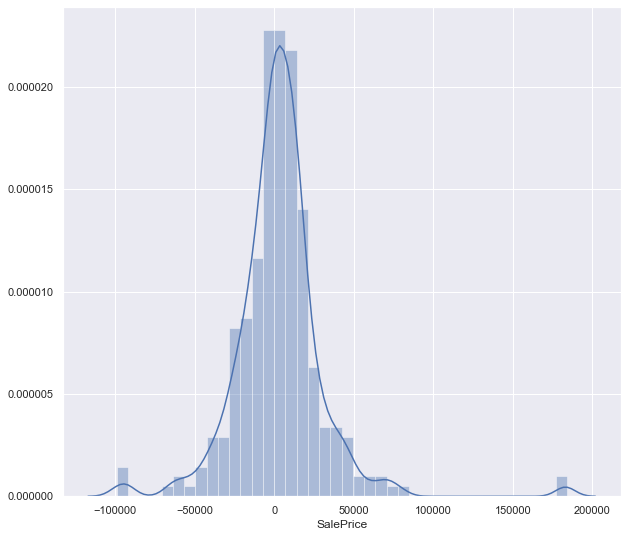

In [55]:
sns.set(rc={"figure.figsize":(10, 9)}) #width=9, height=10
sns.distplot((y_test-predictions))

In [56]:
#Metrics:
from sklearn import metrics

In [57]:
metrics.explained_variance_score(y_test,predictions)

0.8996775570070024

In [60]:
submit_test = whole_dummies[1460:]

In [61]:
submission = lm.predict(submit_test)

In [62]:
submission

array([114469.88447226, 158920.81100468, 179713.49215623, ...,
       151600.57602145, 128201.76062218, 212122.39158695])

In [70]:
sub = pd.DataFrame()

In [71]:
fuck = pd.read_csv("test.csv")

In [73]:
fuck["Id"]

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [84]:
sub["Id"] = fuck["Id"]

In [85]:
sub["SalePrice"] = submission

In [89]:
sub.drop("Price",axis=1,inplace=True)

In [90]:
sub

,Id,SalePrice
0,1461,114469.884472
1,1462,158920.811005
2,1463,179713.492156
3,1464,200256.804500
4,1465,214341.875483
...,...,...
1454,2915,74098.729039
1455,2916,58942.858123
1456,2917,151600.576021
1457,2918,128201.760622


In [92]:
sub.to_csv('sub2.csv',index=False)